<a href="https://colab.research.google.com/github/NeeteshDadwariya/CS6375/blob/main/assignments/assignment2/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
class NeuralNetwork:
  def __init__(self, data_url):
    self.df = pd.read_csv(data_url)
    self.stdscalar = None

    self.print_df('Data', self.df)
    self.print_df('Data Description', self.df.describe())

  def print_df(self, title, df):
    print("\n" + title) 
    if isinstance(df, pd.DataFrame):
      display(df.head(10))
    else:
      print(df)

  def print_info(self, title, df):
    print("\n" + title)
    df.info()

  def pre_process(self):
    #Check for null values
    self.print_df('Null Values:', self.df.isnull().sum())

    #Check for NA values
    self.print_df('NA Values:', self.df.isna().sum())

    #Check for duplicates values
    self.print_df('Duplicate Values:', self.df.duplicated().sum())

    return self.df

  def mark_columns_as_categroical(self, df, cols):
    self.print_info("Columns before converting to categorical variable:" , df)
    df[cols] = df[cols].astype('category')
    self.print_info("Columns after converting to categorical variable:" , df)
    return df

  def convert_categorical_columns_to_OneHotEncoding(self, df):
    #Storing output column, so that can be moved to the last again after encoding.
    output_col = df[df.columns[-1]]
    df = df.drop(columns=df.columns[-1])

    #Will convert categorical variables into OneHotEncoded columns, remove the original columns
    #and will create one base level of category, with other categories being referenced
    #in terms of that category.
    df = pd.get_dummies(df, drop_first=True)

    #Move output column back again to the last
    df = df.join(output_col)
    print(df.info())
    display(df.head(5))

    return df

  #Split the target variable from the data
  def split_X_and_y(self, df):
    no_rows, no_cols = df.shape[0], df.shape[1]
    X =  df.iloc[:, 0:(no_cols -1)]
    y = df.iloc[:, no_cols-1]

    self.print_df('X:', X)
    self.print_df('y:', y)
    return X,y

  #Splitting train and test data
  def split_train_test(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_test shape: ", y_test.shape)
    return X_train, X_test, y_train, y_test

  #Normalizing the data 
  def scale_data(self, df, is_train: bool):
    #Fitting is done only for the train data
    if is_train:
      self.stdscalar = StandardScaler()
      self.stdscalar.fit(df)
    return self.stdscalar.transform(df)

  def train_evaluate(self, 
                     X_train, X_test, y_train, y_test, 
                     hidden_layers, activation, learning_rate, iterations, logs):

    #Buidling the model with specified parameters
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, 
                        activation=activation, 
                        solver='adam', 
                        max_iter=iterations,
                        learning_rate_init=learning_rate, 
                        verbose=logs, random_state=10)
    
    #Fitting the model
    mlp.fit(X_train, y_train)

    #Prediction
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    #Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    return mlp, train_accuracy, test_accuracy




  
    

    


In [3]:
network = NeuralNetwork("https://archive.org/download/heart_data/heart_data.csv")


Data


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol_mg_dl,fasting_blood_sugar_mg_dl,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_st_segment,major_vessel_count,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1



Data Description


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol_mg_dl,fasting_blood_sugar_mg_dl,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_st_segment,major_vessel_count,thal,heart_disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


## Data Preprocessing

In [4]:
df = network.pre_process()


Null Values:
age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestrol_mg_dl                  0
fasting_blood_sugar_mg_dl               0
resting_electrocardiographic_results    0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
oldpeak                                 0
slope_st_segment                        0
major_vessel_count                      0
thal                                    0
heart_disease                           0
dtype: int64

NA Values:
age                                     0
sex                                     0
chest_pain_type                         0
resting_blood_pressure                  0
serum_cholestrol_mg_dl                  0
fasting_blood_sugar_mg_dl               0
resting_electrocardiographic_results    0
max_heart_rate_achieved                 0
exercise_induced_angina              

In [5]:

#Although 3 columns are mentioned as categorical variables - 
#`chest_pain_type`, `resting_electrocardiographic_results` and `thal`
#Still, only converting `thal` because other two are already label encoded.
df = network.mark_columns_as_categroical(df, ['thal'])


Columns before converting to categorical variable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest_pain_type                       270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestrol_mg_dl                270 non-null    int64  
 5   fasting_blood_sugar_mg_dl             270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   max_heart_rate_achieved               270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope_st_segment                  

In [6]:
df = network.convert_categorical_columns_to_OneHotEncoding(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest_pain_type                       270 non-null    int64  
 3   resting_blood_pressure                270 non-null    int64  
 4   serum_cholestrol_mg_dl                270 non-null    int64  
 5   fasting_blood_sugar_mg_dl             270 non-null    int64  
 6   resting_electrocardiographic_results  270 non-null    int64  
 7   max_heart_rate_achieved               270 non-null    int64  
 8   exercise_induced_angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope_st_segment                      270 non-null    int64  
 11  major_vessel_count 

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol_mg_dl,fasting_blood_sugar_mg_dl,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_st_segment,major_vessel_count,thal_6,thal_7,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,0,0,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,0,1,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,0,1,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,0,1,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,0,0,0


In [7]:
#Split X and y
X, y = network.split_X_and_y(df)


X:


,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestrol_mg_dl,fasting_blood_sugar_mg_dl,resting_electrocardiographic_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope_st_segment,major_vessel_count,thal_6,thal_7
0,70,1,4,130,322,0,2,109,0,2.4,2,3,0,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,0,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,0,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,0,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,0,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,0,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,1,0
7,59,1,4,110,239,0,2,142,1,1.2,2,1,0,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,0,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,0,1



y:
0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: heart_disease, Length: 270, dtype: int64


In [8]:
#Splitting the data into train and test data
X_train, X_test, y_train, y_test = network.split_train_test(X, y)

X_train shape:  (216, 14)
y_train shape:  (216,)
X_test shape:  (54, 14)
y_test shape:  (54,)


In [9]:
#Scale data by doing normalization
X_train = network.scale_data(X_train, is_train=True)
X_test = network.scale_data(X_test, is_train=False)

## Building and evaluating model performance.
 

In [10]:
#Defining model hyperparameters
learning_rate = 0.1
activation = 'tanh'
iterations = 100
hidden_layers = [4, 2]

In [11]:
#Training and evaluating model
mlp, train_accuracy, test_accuracy = network.train_evaluate(
    X_train, X_test, y_train, y_test,
    hidden_layers, activation, learning_rate, iterations,
    logs=True
)

Iteration 1, loss = 0.69317556
Iteration 2, loss = 0.46020016
Iteration 3, loss = 0.40484960
Iteration 4, loss = 0.38476734
Iteration 5, loss = 0.36257313
Iteration 6, loss = 0.35396121
Iteration 7, loss = 0.34920299
Iteration 8, loss = 0.34173332
Iteration 9, loss = 0.34479069
Iteration 10, loss = 0.34060883
Iteration 11, loss = 0.33327348
Iteration 12, loss = 0.33342692
Iteration 13, loss = 0.32639619
Iteration 14, loss = 0.32784819
Iteration 15, loss = 0.33079443
Iteration 16, loss = 0.33072445
Iteration 17, loss = 0.31903990
Iteration 18, loss = 0.31301211
Iteration 19, loss = 0.31169288
Iteration 20, loss = 0.30958445
Iteration 21, loss = 0.30231046
Iteration 22, loss = 0.29335576
Iteration 23, loss = 0.28802115
Iteration 24, loss = 0.28647546
Iteration 25, loss = 0.28549372
Iteration 26, loss = 0.28334412
Iteration 27, loss = 0.28066008
Iteration 28, loss = 0.27641152
Iteration 29, loss = 0.27191591
Iteration 30, loss = 0.26994901
Iteration 31, loss = 0.26693911
Iteration 32, los

In [12]:
print('Overall training loss:', mlp.loss_)
print('Model Training Accuracy: ', train_accuracy)
print('Model Testing Accuracy: ', test_accuracy)

Overall training loss: 0.19435251211543517
Model Training Accuracy:  0.9398148148148148
Model Testing Accuracy:  0.8148148148148148


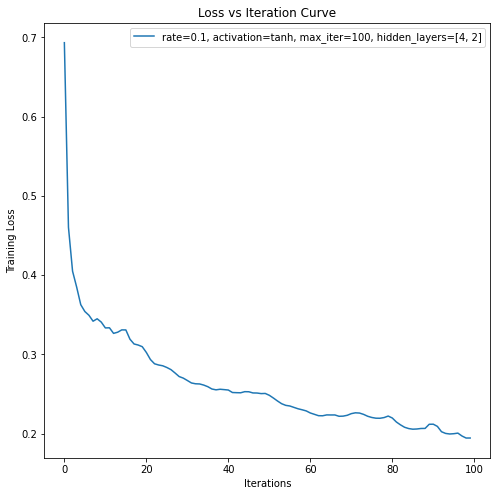

In [13]:
label="rate={}, activation={}, max_iter={}, hidden_layers={}".format(learning_rate, activation, iterations, hidden_layers)
plt.figure(figsize=(8,8))
plt.plot(mlp.loss_curve_, label=label)  
plt.title("Loss vs Iteration Curve") 
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.legend()

In [ ]:
iterations = [100, 200, 500, 1000]
learning_rates = [0.1, 0.01]
activations = ['tanh', 'logistic', 'relu']
hidden_layers = [(2,3), (4, 2), (3,4,5)]

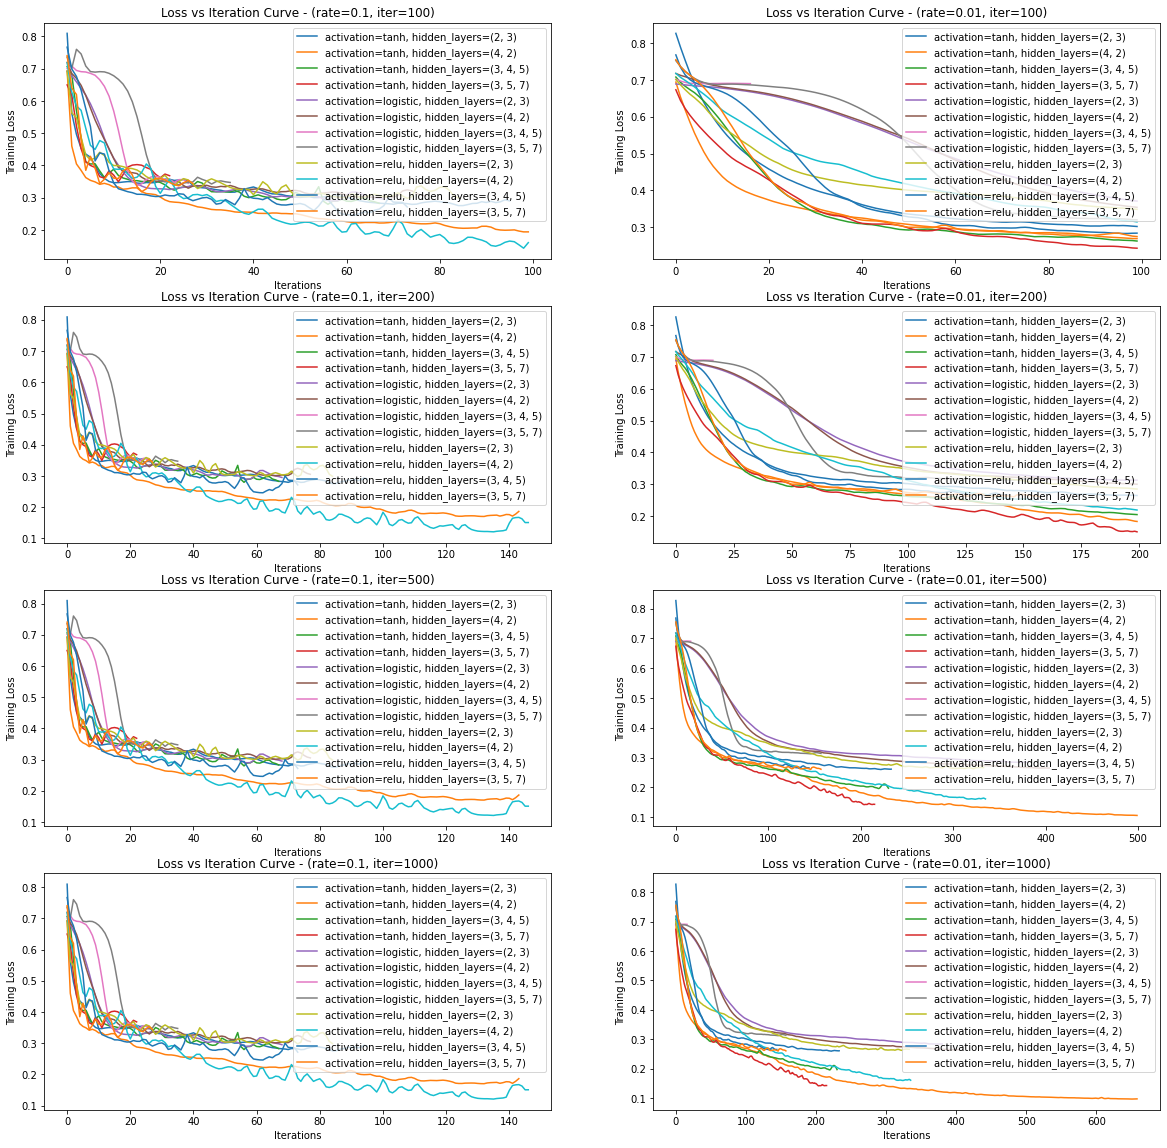

In [15]:
plt.figure(figsize=(20,20))

i = 0
model_params = []
for iter in iterations:
  for rate in learning_rates:
  
    i+=1
    plt.subplot(len(iterations), len(learning_rates), i)
    
    for act_fun in activations:
      for layer in hidden_layers:
        mlp, train_accuracy, test_accuracy = network.train_evaluate(
          X_train, X_test, y_train, y_test,
          layer, act_fun, rate, iter,
          logs=False 
        )

        model_params.append({
            'rate': rate,
            'activation': act_fun,
            'iter': iter,
            'layer': layer,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        });
        label="activation={}, hidden_layers={}".format(act_fun, layer)
        plt.plot(mlp.loss_curve_, label=label)  
    
    plt.legend()
    plt.title("Loss vs Iteration Curve - (rate={}, iter={})".format(rate, iter)) 
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")





In [16]:
#Finding best 5 combinations for the model hyperparameters according to the test accuracy
sorted(model_params,key=lambda x: x['test_accuracy'], reverse=True)[:5]

[{'activation': 'relu',
  'iter': 100,
  'layer': (2, 3),
  'rate': 0.1,
  'test_accuracy': 0.8518518518518519,
  'train_accuracy': 0.8703703703703703},
 {'activation': 'relu',
  'iter': 100,
  'layer': (3, 4, 5),
  'rate': 0.1,
  'test_accuracy': 0.8518518518518519,
  'train_accuracy': 0.8888888888888888},
 {'activation': 'relu',
  'iter': 200,
  'layer': (2, 3),
  'rate': 0.1,
  'test_accuracy': 0.8518518518518519,
  'train_accuracy': 0.8703703703703703},
 {'activation': 'relu',
  'iter': 200,
  'layer': (3, 4, 5),
  'rate': 0.1,
  'test_accuracy': 0.8518518518518519,
  'train_accuracy': 0.8888888888888888},
 {'activation': 'relu',
  'iter': 500,
  'layer': (2, 3),
  'rate': 0.1,
  'test_accuracy': 0.8518518518518519,
  'train_accuracy': 0.8703703703703703}]

In [ ]:
plt.figure(figsize=(20,20))

i = 0
model_params = []

for rate in learning_rates:

  i+=1
  plt.subplot(len(iterations), len(learning_rates), i)
  
  for act_fun in activations:
    for layer in hidden_layers:

      max_epoch = 200
      epochs = []
      accuracies = []

      for epoch in range(1,max_epoch):
        mlp, train_accuracy, test_accuracy = network.train_evaluate(
          X_train, X_test, y_train, y_test,
          layer, act_fun, rate, iter,
          logs=False 
        )

        model_params.append({
            'rate': rate,
            'activation': act_fun,
            'iter': iter,
            'layer': layer,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        });

        epochs.append(epoch)
        accuracies.append(test_accuracy)
        
      label="activation={}, hidden_layers={}".format(act_fun, layer)
      plt.plot(epochs, accuracies, label=label)  
    
    plt.legend()
    plt.title("Test Accuracy vs Iteration Curve - (rate={}, iter={})".format(rate, max_epoch)) 
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")



